In [1]:
import seaborn as sns

import bokeh
import bokeh.models
import bokeh.plotting

import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [58]:
def visualize_similarity(distances, labels_1, labels_2,
                         plot_title="",
                         plot_width=1200, plot_height=600,
                         xaxis_font_size='12pt', yaxis_font_size='12pt'):


  df = pd.DataFrame(zip(labels_1, labels_2, distances),
                    columns=['embeddings_1', 'embeddings_2', 'sim'])

  min_distance = min(distances)
  max_distance = max(distances)

  mapper = bokeh.models.LinearColorMapper(
      palette=[*reversed(bokeh.palettes.YlOrRd[9])], low=min_distance, high=max_distance)

  p = bokeh.plotting.figure(title=plot_title, x_range=labels_1,
                            x_axis_location="above",
                            y_range=[*reversed(labels_2)],
                            plot_width=plot_width, plot_height=plot_height,
                            tools="save",toolbar_location='below', tooltips=[
                                ('pair', '@embeddings_1 ||| @embeddings_2'),
                                ('sim', '@sim')])
  p.rect(x="embeddings_1", y="embeddings_2", width=1, height=1, source=df,
         fill_color={'field': 'sim', 'transform': mapper}, line_color=None)

  p.title.text_font_size = '12pt'
  p.axis.axis_line_color = None
  p.axis.major_tick_line_color = None
  p.axis.major_label_standoff = 16
  p.xaxis.major_label_text_font_size = xaxis_font_size
  p.xaxis.major_label_orientation = 0.25 * np.pi
  p.yaxis.major_label_text_font_size = yaxis_font_size
  p.min_border_right = 300

  bokeh.io.output_notebook()
  bokeh.io.show(p)


def vis_sim(original, answers, answers_sim, folder_path="/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/images/sentences/"):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.heatmap([answers_sim], center=-0.5, annot=True, cbar=False)

    ax.set_yticklabels(["origin"])
    ax.set_xticklabels(["%i answer" % (i+1) for i in range(len(answers))])

    print("origin - %s" % original)
    for i in range(len(answers)):
        print()

    plt.show()

    file_name = "sentence_sim"
    plt.savefig(folder_path + file_name + '.png')
    lines = "origin - %s\n" % original
    for i in range(len(answers)):
        lines += "%i answer - %s\n" % (i+1, answers[i])
    with open(folder_path + file_name + ".txt", "w") as file:
        print(lines)
        file.write(lines)


def print_feature_comparing(values):
    # values = {"bert": [3,5,1], "use": [1,4,2], "ner": [2, 3,2]}

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    index = np.arange(3) # len([3,5,1])
    bar_width = 0.35
    opacity = 0.5

    for feature_name in values.keys():
        plt.bar(index, values[feature_name], bar_width,
            alpha=opacity,
            label=feature_name)

    plt.xlabel('Person')
    plt.ylabel('Scores')
    plt.title('Scores by person')
    plt.xticks(index + bar_width, ('5', '4', '3'))
    plt.legend()

    file_prefix = '/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/images/sentences/'
    plt.savefig(file_prefix + "sentence_comparison" +'.png')

    plt.tight_layout()
    plt.show()

def feature_comparing():
    data = pd.read_csv("/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/normalized/data_origin.csv")
    index = 10
    original = data["original"][index]
    features = ["tfidf_distance", "laser_distance", "use_distance", "fasttext_distance", "bert_distance", "ner_custom_overlap", "ner_overlap"]
    values = {}
    for i in features:
        values[i] = []

    for i in [5, 4, 3]:
        targets = data.loc[(data["original"] == original) & (data["score"] == i)]
        for feature in features:
            values[feature].append(targets[feature].values[0])
    print_feature_comparing(values)

    values = {k: v for k, v in sorted(values.items(), key=lambda item: item[1][2])}
    lines = ""
    lines += ("=== Lowest ==="+"\n")
    for item in list(values.items())[:2]:
        lines += (item[0] + ": " + str(item[1][2]) + "\n")
    lines += ("=== Highest ==="+"\n")
    for item in list(values.items())[-2:]:
        lines += (item[0] + ": " + str(item[1][2]) + "\n")

    file_prefix = '/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/images/sentences/'
    file_path = file_prefix + "sentence_comparison" +'.txt'
    with open(file_path, "w") as file:
        print(lines)
        file.write(lines)

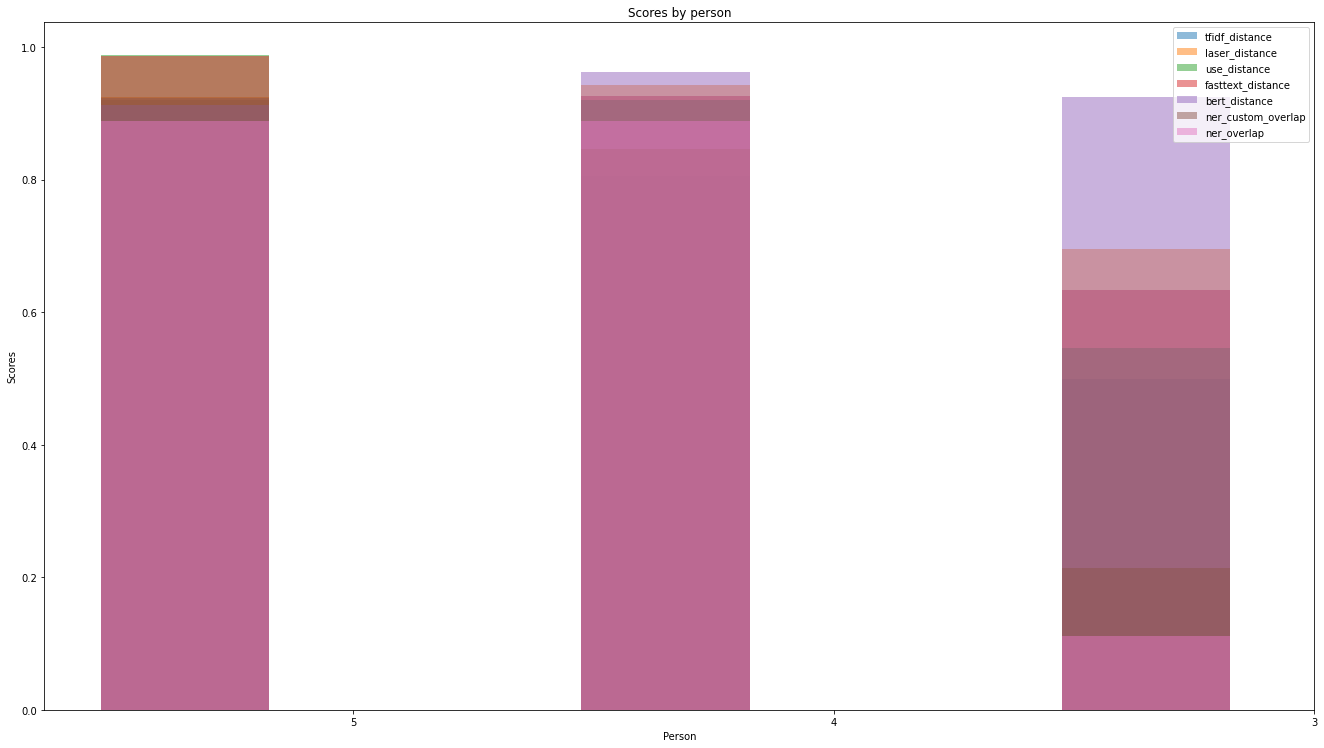

=== Lowest ===
ner_overlap: 0.1111111111111111
ner_custom_overlap: 0.21428571428571427
=== Highest ===
laser_distance: 0.6955209374427795
bert_distance: 0.92538816



In [59]:
feature_comparing()


In [ ]:
# original = "111"
# targets = ["1", "2", "3"]
# distances = [0.1, 0.2, 0.3]
# # visualize_similarity(distances, originals, targets)
# vis_sim(original, targets, distances)

In [144]:
ALL_SCORES_FILE_NAME = "all_scores"
MOST_SCORES_FILE_NAME = "most_scores"
LESS_SCORES_FILE_NAME = "less_scores"

BEST_BY_TYPE_FILE_NAME = "best_by_type_scores"
CLASSIFICATION_RESULT = "/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/classification/scores.json"
CLASSIFICATION_RESULT_TOGETHER = "/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/classification/scores_together.json"

def print_scores(scores_structure, file_name):
    features_names = scores_structure[0] #[', '.join(x) for x in scores_structure[0]]
    features = scores_structure[1]
    feature_indexies = list(range(len(features)))
    # plt.figure(figsize=(20,20))
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'font.size': 30})
    plt.bar(feature_indexies, scores_structure[1], align='edge', width=0.3, alpha=0.6)
    plt.ylabel('score', fontsize=44)
    plt.xlabel('features', fontsize=44)
    file_prefix = '/home/droman/Documents/diploma/deeppavlov_ner_3.6/data/output/images/'
    plt.savefig(file_prefix + file_name+'.png')
    plt.show()
    lines = ""
    for i in range(len(feature_indexies)):
        line = str(i) + " - " + str(round(features[i], 4)) + ": " + features_names[i] + " :"
        lines += line + "\n"
    with open(file_prefix + file_name + ".txt", "w") as file:
        print(lines)
        file.write(lines)

def get_scores(input=CLASSIFICATION_RESULT):
    with open(input) as json_file:
        return json.load(json_file)

def get_columns_from_json(scores_data):
    try:
        return [item["data_type"] + ": " + ', '.join(x_column) + " :" for item in scores_data["items"] for x_column in item["x_columns"]]
    except:
        return [', '.join(x_column) for item in scores_data["items"] for x_column in item["x_columns"]]

def get_scores_from_json(scores_data):
    return [score for item in scores_data["items"] for score in item["scores"]]

def most_scored():
    print_scored_abstract(lambda x: x[-10:], MOST_SCORES_FILE_NAME)
def less_scored():
    print_scored_abstract(lambda x: x[:10], LESS_SCORES_FILE_NAME)
def all_scored():
    print_scored_abstract(lambda x: x, ALL_SCORES_FILE_NAME)

def most_scored_together():
    print_scored_abstract(lambda x: x[-10:], MOST_SCORES_FILE_NAME+"_together", scores_file=CLASSIFICATION_RESULT_TOGETHER)
def less_scored_together():
    print_scored_abstract(lambda x: x[:10], LESS_SCORES_FILE_NAME+"_together", scores_file=CLASSIFICATION_RESULT_TOGETHER)
def all_scored_together():
    print_scored_abstract(lambda x: x, ALL_SCORES_FILE_NAME+"_together", scores_file=CLASSIFICATION_RESULT_TOGETHER)



def best_by_type():
    def _get_columns_from_json(scores_data):
        result = []
        for item in scores_data["items"]:
            scores = item["scores"]
            max_index = scores.index(max(scores))
            result.append(item["data_type"] + ": " + ', '.join(item["x_columns"][max_index]))
        return result

    def _get_scores_from_json(scores_data):
        result = []
        for item in scores_data["items"]:
            result.append(max(item["scores"]))
        return result

    print_scored_abstract(lambda x: x[-10:], BEST_BY_TYPE_FILE_NAME, _get_columns_from_json, _get_scores_from_json)


def scores_by_feature(feature, feature2=None):
    def filter_fun(xx):
        if feature2 is None:
            return feature in xx[0]
        else:
            return feature in xx[0] or feature2 in xx[0]
    print_scored_abstract(lambda x: list(filter(filter_fun, x)), "scores_by_" + feature)


def print_scored_abstract(get_part, file_name, _get_columns_from_json=get_columns_from_json, _get_scores_from_json=get_scores_from_json, scores_file=CLASSIFICATION_RESULT):
    scores_data = get_scores(scores_file)

    columns = _get_columns_from_json(scores_data)
    scores = _get_scores_from_json(scores_data)

    pairs = []
    assert len(columns) == len(scores)
    for i in range(len(columns)):
        pairs.append([columns[i], scores[i]])

    pairs = sorted(pairs, key=lambda x: x[1])
    pairs = get_part(pairs)

    columns = [i[0] for i in pairs]
    scores = [i[1] for i in pairs]

    print_scores([columns, scores], file_name)


In [145]:
# less_scored_together()
# most_scored_together()
# all_scored_together()

# best_by_type()
# less_scored()
# most_scored()
# all_scored()


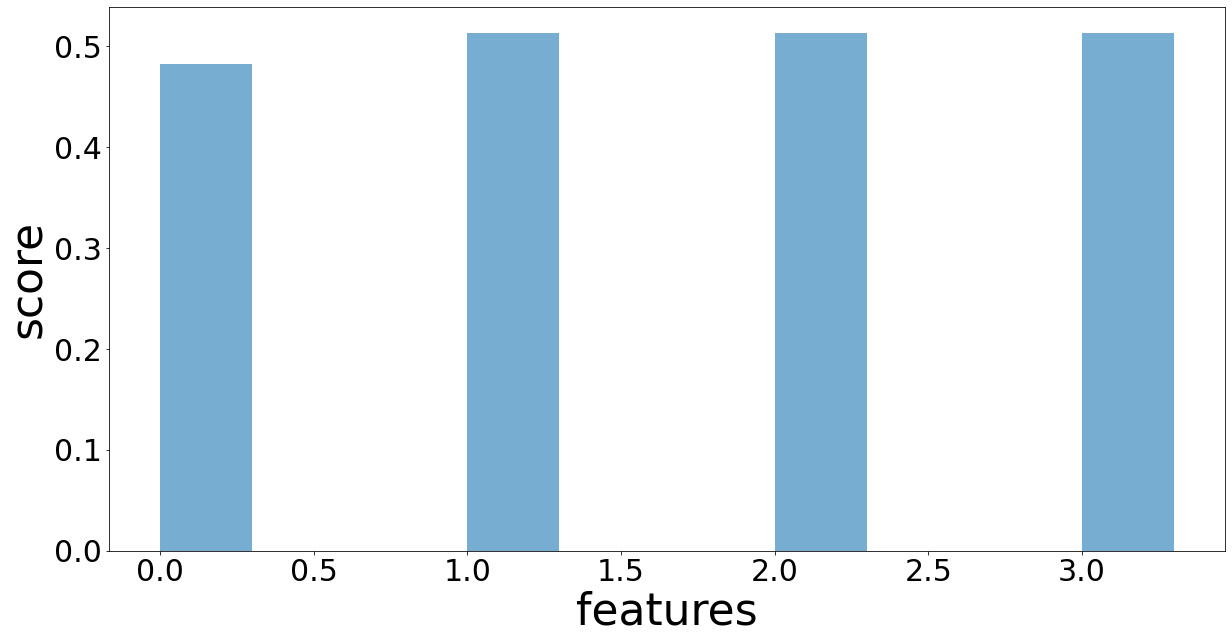

0 - 0.4825: data_origin: ner_custom_overlap : :
1 - 0.5133: data_preprocess: ner_custom_overlap : :
2 - 0.5133: data_semi_preprocc_with_stopwords: ner_custom_overlap : :
3 - 0.5133: data_semi_preprocess_without_stopwords: ner_custom_overlap : :



In [146]:
scores_by_feature(": ner_custom_overlap :")
# scores_by_feature(": ner_overlap :")
# scores_by_feature(": laser_distance :")
# scores_by_feature(": fasttext_distance :")
# scores_by_feature(": bert_distance :")
# scores_by_feature(": use_distance :")
# scores_by_feature(": tfidf_distance :")


In [ ]:
# scores_by_feature(": ner_overlap", ": laser_distance :")